# Naive Bayes Project
#### Team:  Neha Boi, Liam Nguyen
#### CECS 550

In [1]:
# Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
FILE_NAME = "diabetes.csv"
TRAIN_TEST_RATIO = 0.8 
TN = 0
FP = 0 
FN = 0
TP = 0 

In [3]:
train_data = pd.read_csv("./train_test_data/train.csv", header = None)
test_set = pd.read_csv("./train_test_data/test.csv", header = None)
print(test_set)

        0      1     2     3      4     5      6     7    8
0     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  0.0
1     0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  1.0
2     8.0  125.0  96.0   0.0    0.0   0.0  0.232  54.0  1.0
3    10.0  139.0  80.0   0.0    0.0  27.1  1.441  57.0  0.0
4     1.0  189.0  60.0  23.0  846.0  30.1  0.398  59.0  1.0
..    ...    ...   ...   ...    ...   ...    ...   ...  ...
249   9.0   89.0  62.0   0.0    0.0  22.5  0.142  33.0  0.0
250  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0  0.0
251   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0  0.0
252   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0  1.0
253   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0  0.0

[254 rows x 9 columns]


In [4]:
# Funtions
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return p

def calulate_posterior(prior_probability,data_list,mean_list,variance_list):
    result = prior_probability;
    for i in range(len(data_list)):
        result = result * p_x_given_y(data_list[i],mean_list[i],variance_list[i])
    return result

def clasifier(test_entry):
    global TN , TP, FP, FN
    yes_posterior_prob = calulate_posterior(p_s,test_entry[0:Number_of_features],Yes_mean_list,Yes_Variance_list)
    no_posterior_prob = calulate_posterior(p_f,test_entry[0:Number_of_features],No_mean_list,No_Variance_list)
    if yes_posterior_prob > no_posterior_prob:
        predicted_prob = 1
    else:
        predicted_prob = 0
    if(predicted_prob == 0 and test_entry[Number_of_features]==0):
        TN = TN + 1
    if(predicted_prob == 1 and test_entry[Number_of_features]==1):
        TP = TP + 1
    if(predicted_prob == 1 and test_entry[Number_of_features]==0):
        FP = FP + 1
    if(predicted_prob == 0 and test_entry[Number_of_features]==1):
        FN = FN + 1


In [5]:
# data = pd.read_csv(FILE_NAME)
# data.hist(figsize=(20, 10));

In [6]:
# msk = np.random.rand(len(data)) < TRAIN_TEST_RATIO

# Split into train and test set
# train_data = data[msk] 
# test_set = data[~msk]

column_list = train_data.columns.tolist()
Number_of_features = len(train_data.columns)-1
Outcome_Column = train_data.columns[Number_of_features]

data_means = train_data.groupby(Outcome_Column).mean()
data_variance = train_data.groupby(Outcome_Column).var()

In [7]:
Yes_outcome = 1
No_outcome = 0

n_f = train_data[Outcome_Column][train_data[Outcome_Column] == No_outcome].count()
n_s = train_data[Outcome_Column][train_data[Outcome_Column] == Yes_outcome].count()
total = train_data[Outcome_Column].count()

# Calculate priors
p_f = n_f / total
p_s = n_s / total

# Gather stats
No_mean_list = list()
No_Variance_list = list()
Yes_mean_list = list()
Yes_Variance_list = list()

for x in range(Number_of_features):
    No_mean_list.append(data_means[column_list[x]][data_variance.index == No_outcome].values[0])
    No_Variance_list.append(data_variance[column_list[x]][data_variance.index == No_outcome].values[0])
    Yes_mean_list.append(data_means[column_list[x]][data_variance.index == Yes_outcome].values[0])
    Yes_Variance_list.append(data_variance[column_list[x]][data_variance.index == Yes_outcome].values[0])

In [8]:
# Run model
for index,row in test_set.iterrows():
    clasifier(row.values)

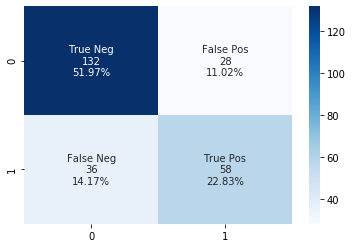

In [9]:
# Confusion matrix
cf_matrix = np.array([[TN, FP], [FN, TP]])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

In [10]:
accuracy = (TP + TN) / (TP + FP + TN +FN)
error = (FP + FN) / (TP + FP + TN +FN)
sensitivity = TP / (FN + TP)
specificity = TN / (TN + FP)

report_stats = pd.DataFrame({
    "Accuracy": [accuracy],
    "Error: ": [error],
    "Sensitivity: ": [sensitivity],
    "Specificity: ": [specificity]
})

print(report_stats.to_string(index=False))

 Accuracy   Error:   Sensitivity:   Specificity: 
 0.748031  0.251969       0.617021          0.825


In [11]:
print("Interpretation\n")
print(f"The Gaussian model gives us {accuracy * 100:.2f}% accuracy with {error * 100:.2f}% error\n")
print(f"Sensitivity shows that this model will correctly return positive result for {sensitivity * 100:.2f}% of people who have the disease and false negative for {(1 - sensitivity) * 100:.2f}% of people who have the disease and should have tested positive.\n")
print(f"Specificity shows that this model will correctly return negative result for {specificity * 100:.2f}% of people who don't have the disease and false positive for {(1 - specificity) * 100:.2f}% of people who don't have the disease and should have tested negative.\n")

Interpretation

The Gaussian model gives us 74.80% accuracy with 25.20% error

Sensitivity shows that this model will correctly return positive result for 61.70% of people who have the disease and false negative for 38.30% of people who have the disease and should have tested positive.

Specificity shows that this model will correctly return negative result for 82.50% of people who don't have the disease and false positive for 17.50% of people who don't have the disease and should have tested negative.

